<a href="https://colab.research.google.com/github/manasik29/Ensemble_Techniques/blob/main/Decision_Tree_%26_Random_Forest_Fraud_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:(Decision Tree)**

Use decision trees to prepare a model on fraud data 

- Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

- Undergrad : person is under graduated or not

- Marital.Status : marital status of a person

- Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

- Work Experience : Work experience of an individual person

- Urban : Whether that person belongs to urban area or not


# **Problem Statement(Random Forest)**

Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"



**Load Data and Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data = pd.read_csv('/content/Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [ ]:
data.shape

(600, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


- Here we have a few categorical features - Undergrad, Marital.Status, Urban.

- Our target variable is Taxable.Income, if Taxable Income <= 30000, person is of "Risky" category and if Taxable Income is > 30000, person of this category is "Good". 

- We will have to create a new column for category of person either he/she is "Good' or "Risky".

**EDA**

In [ ]:
#check missing values
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

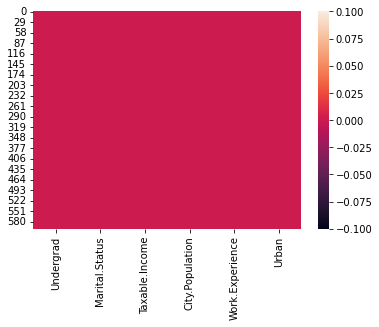

In [ ]:
sns.heatmap(data.isna())

In [ ]:
#check for duplicates in data
data[data.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


Hence, we can conclude no missing values or duplicates in our data.

**Data PreProcessing**

Our data types of columns also seem to be correct, but we will create a new column inplce of Taxable.Income to represent category of person is "Good" or "Risky".

- We will assign "Good" as 1

- And "Risky" as 0.

In [3]:
#check for which rows Taxable.Income <= 30000 and save observation in df1
df1 = data[data['Taxable.Income'] <= 30000]
df1.reset_index(drop= True, inplace= True) 

In [ ]:
pd.set_option('display.max_rows', None)
df1

In [5]:
df1['Category'] = pd.Series(0 for x in range(len(df1.index)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
#check for which rows Taxable.Income > 30000 and save observation in df2
df2 = data[data['Taxable.Income'] > 30000]
df2.reset_index(drop= True, inplace= True) 

In [7]:
df2['Category'] = pd.Series(1 for x in range(len(df2.index)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
pd.set_option('display.max_rows', None)
df2

In [8]:
#we will merge df1 and df2 and also drop Taxable.Income as well as City.Population as they will not be required
df = pd.concat([df1, df2], axis=0)
df.reset_index(drop= True, inplace= True)


In [9]:
df.drop(['Taxable.Income','City.Population'], axis=1, inplace=True)

In [10]:
df.head()

,Undergrad,Marital.Status,Work.Experience,Urban,Category
0,NO,Single,19,YES,0
1,NO,Divorced,14,YES,0
2,YES,Divorced,29,NO,0
3,NO,Single,30,YES,0
4,YES,Divorced,7,YES,0


So 'Category' will be our target variable and rest are our independent features.

**Data Visualosation**

YES    312
NO     288
Name: Undergrad, dtype: int64


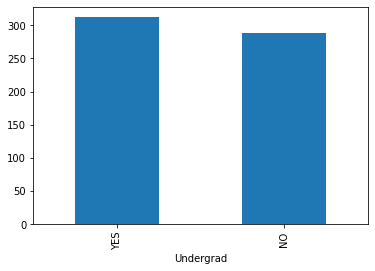

In [ ]:
df['Undergrad'].value_counts().plot.bar()
plt.xlabel('Undergrad')
print(df['Undergrad'].value_counts())

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64


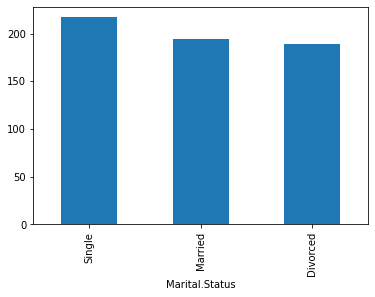

In [ ]:
df['Marital.Status'].value_counts().plot.bar()
plt.xlabel('Marital.Status')
print(df['Marital.Status'].value_counts())

YES    302
NO     298
Name: Urban, dtype: int64


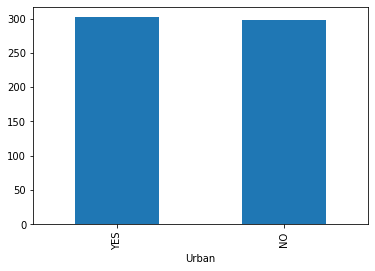

In [ ]:
df['Urban'].value_counts().plot.bar()
plt.xlabel('Urban')
print(df['Urban'].value_counts())

1    476
0    124
Name: Category, dtype: int64


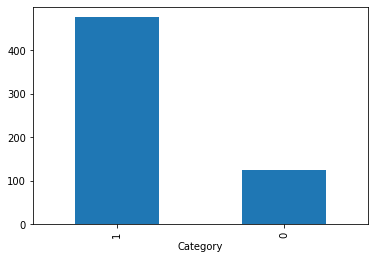

In [ ]:
df['Category'].value_counts().plot.bar()
plt.xlabel('Category')
print(df['Category'].value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


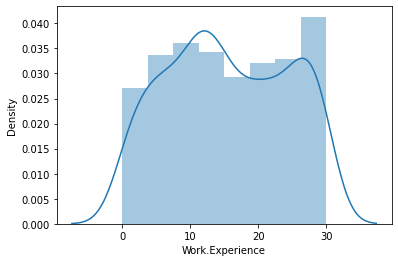

In [ ]:
sns.distplot(df['Work.Experience'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


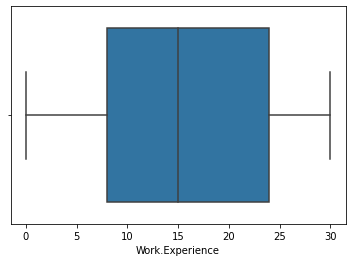

In [ ]:
#check for outliers
sns.boxplot(df['Work.Experience'])

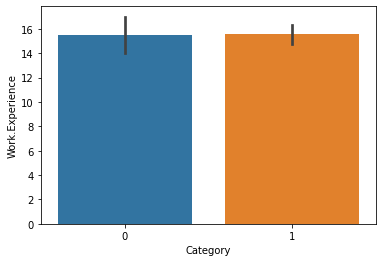

In [ ]:
sns.barplot(y= 'Work.Experience',x ='Category', data=df)

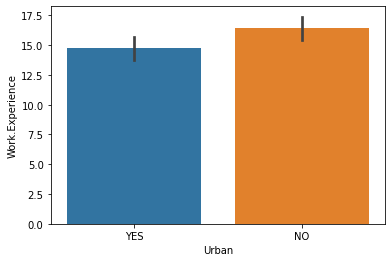

In [ ]:
sns.barplot(y= 'Work.Experience',x ='Urban', data=df)

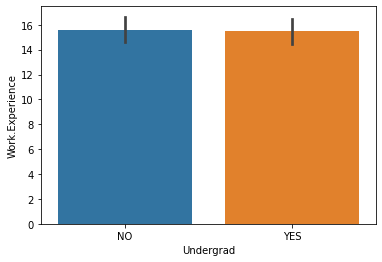

In [ ]:
sns.barplot(y= 'Work.Experience',x ='Undergrad', data=df)

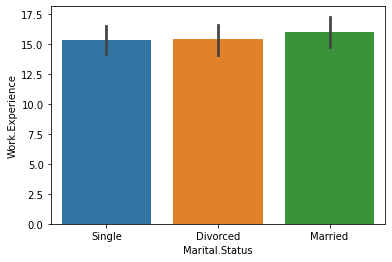

In [ ]:
sns.barplot(y= 'Work.Experience',x ='Marital.Status', data=df)

- Not very significant dependencies can be found by data visualisations.

**One Hot encoding**

We will perform one hot encoding on Urban, Marital.Status, Undergrad features.

In [11]:
df = pd.get_dummies(df)

In [12]:
df.head()

,Work.Experience,Category,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,19,0,1,0,0,0,1,0,1
1,14,0,1,0,1,0,0,0,1
2,29,0,0,1,1,0,0,1,0
3,30,0,1,0,0,0,1,0,1
4,7,0,0,1,1,0,0,0,1


**Dependency of Category on other features**

We can also check for dependency of Category(target variable) on other features of data with correlation and PPS.

In [ ]:
#correlation of Category with other features
df.corr().iloc[1,:]

Work.Experience            0.001972
Category                   1.000000
Undergrad_NO               0.012523
Undergrad_YES             -0.012523
Marital.Status_Divorced    0.027115
Marital.Status_Married    -0.043178
Marital.Status_Single      0.015820
Urban_NO                   0.004830
Urban_YES                 -0.004830
Name: Category, dtype: float64

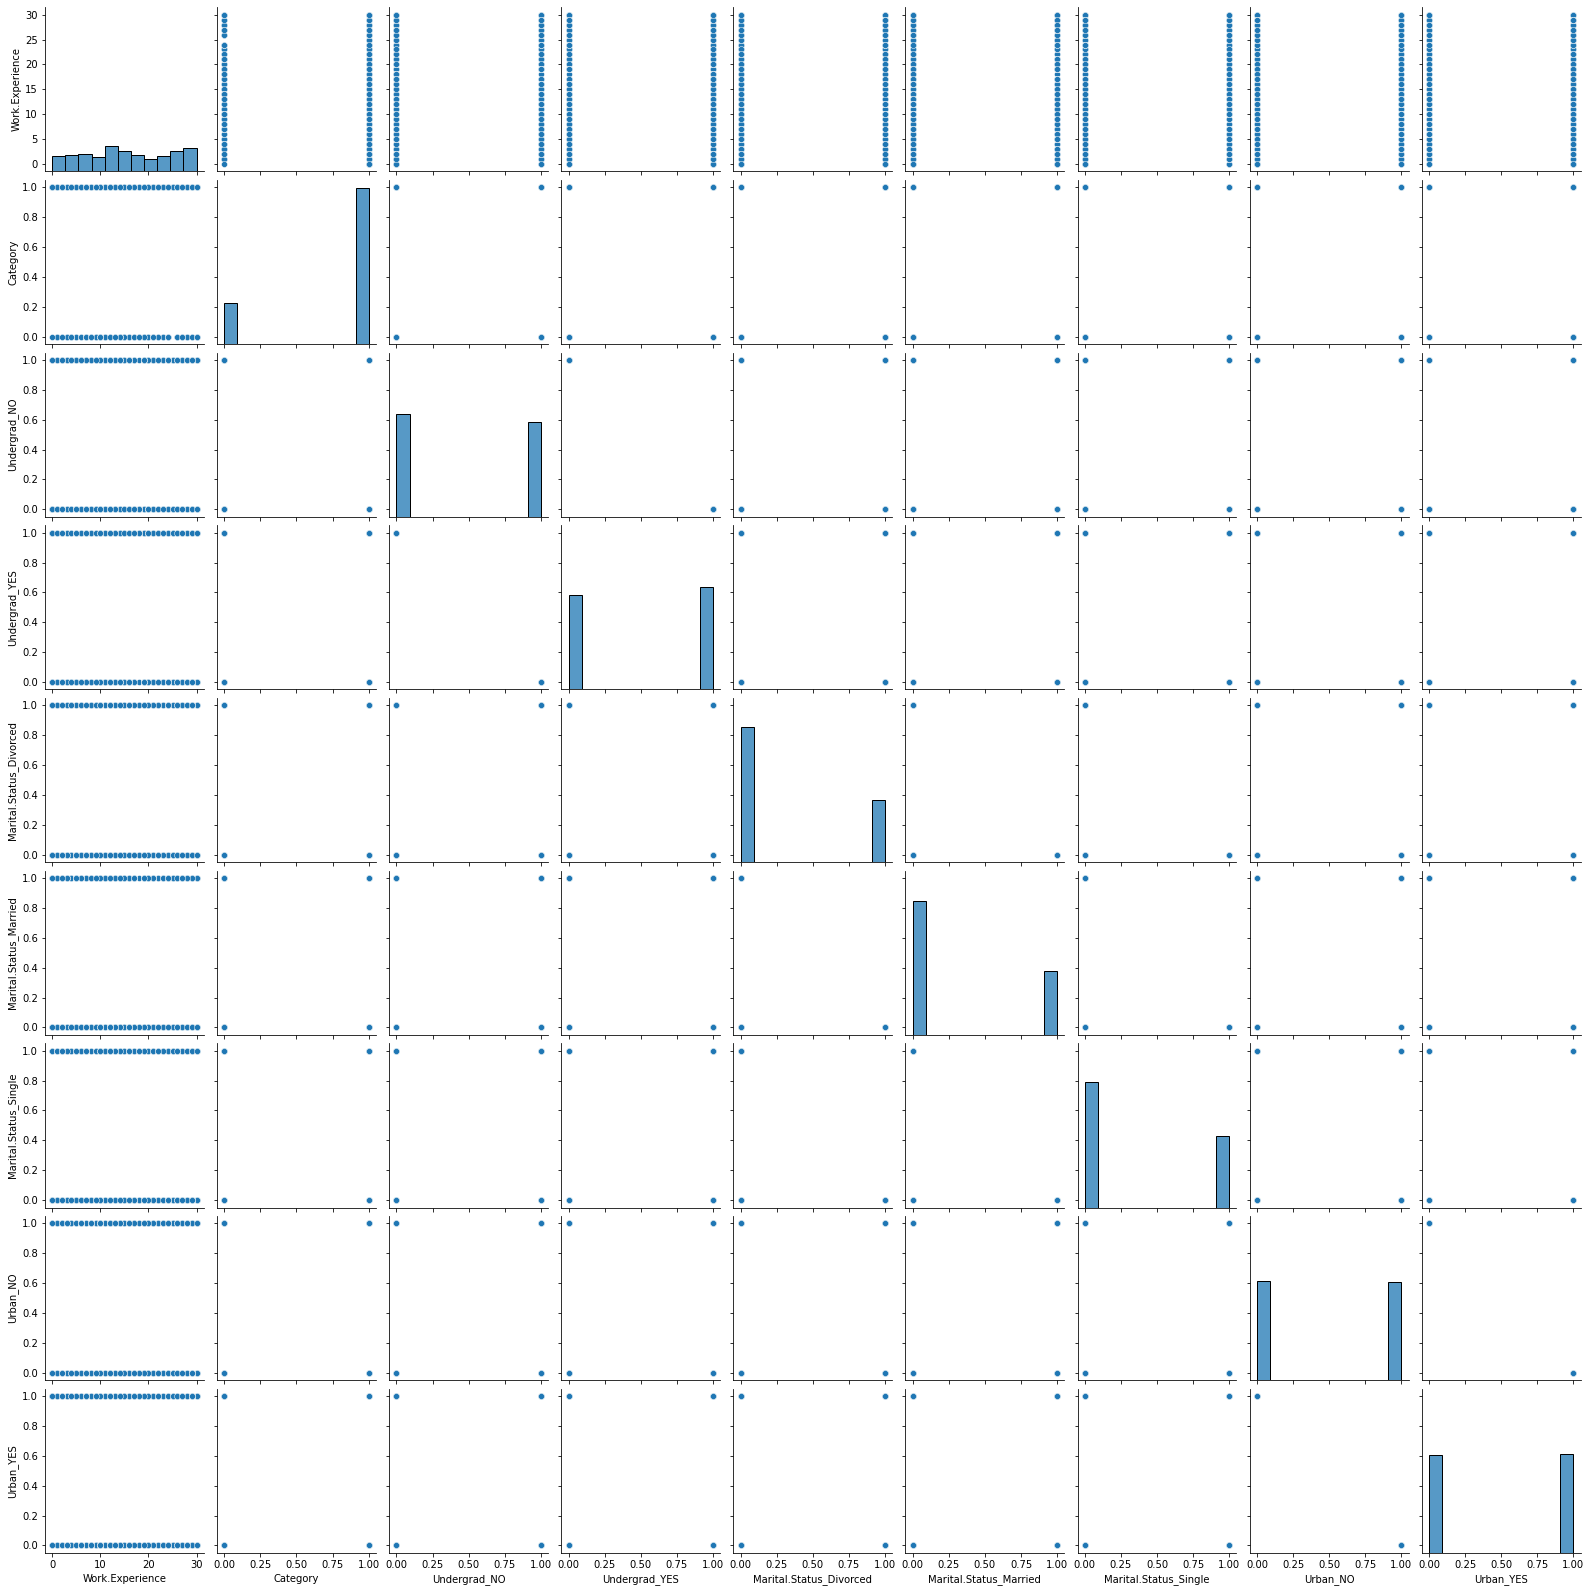

In [ ]:
sns.pairplot(df)

In [ ]:
#PPS
!pip install ppscore

In [ ]:
import ppscore as pps

In [ ]:
with pd.option_context("display.max_rows", None):
    display(pps.matrix(df))

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Work.Experience,Work.Experience,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Work.Experience,Category,0.000000,regression,True,mean absolute error,0.206667,0.327970,DecisionTreeRegressor()
2,Work.Experience,Undergrad_NO,0.000000,regression,True,mean absolute error,0.480000,0.498557,DecisionTreeRegressor()
3,Work.Experience,Undergrad_YES,0.000000,regression,True,mean absolute error,0.480000,0.498557,DecisionTreeRegressor()
4,Work.Experience,Marital.Status_Divorced,0.000000,regression,True,mean absolute error,0.315000,0.432021,DecisionTreeRegressor()
5,Work.Experience,Marital.Status_Married,0.000000,regression,True,mean absolute error,0.323333,0.442167,DecisionTreeRegressor()
6,Work.Experience,Marital.Status_Single,0.000000,regression,True,mean absolute error,0.361667,0.467733,DecisionTreeRegressor()
7,Work.Experience,Urban_NO,0.000000,regression,True,mean absolute error,0.496667,0.499499,DecisionTreeRegressor()
8,Work.Experience,Urban_YES,0.000000,regression,True,mean absolute error,0.496667,0.499499,DecisionTreeRegressor()
9,Category,Work.Experience,0.000000,regression,True,mean absolute error,7.598333,7.652601,DecisionTreeRegressor()


Before we build a model for our data we will check for outliers by **Isolation Forest Technique**.

In [ ]:
from sklearn.ensemble import IsolationForest
data2 = df.copy()


#training the model
clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(data2)

IsolationForest(contamination=0.01, random_state=10)

In [ ]:
data2['anamoly'] = clf.predict(data2.iloc[:,0:9])
data2[data2['anamoly']==-1]

,Work.Experience,Category,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,anamoly
6,1,0,0,1,1,0,0,0,1,-1
40,30,0,1,0,1,0,0,1,0,-1
45,4,0,1,0,1,0,0,0,1,-1
60,1,0,0,1,1,0,0,1,0,-1
66,1,0,1,0,1,0,0,1,0,-1
69,1,0,0,1,0,0,1,0,1,-1


These datapoints are **outliers** in our data.

We can eliminate these points to improve our model. There are other methods of imputation as well, but here we will go with elimination.


In [13]:
df_final = df.drop([6,40,45,60,66,69])
df_final.shape

(594, 9)

6 datapoints which were **outliers** were **dropped** from our data to **improve our model**.

**Model Building**

**Building Decision Tree based on Entropy criteria**

In [ ]:
df_final.head()

,Work.Experience,Category,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,19,0,1,0,0,0,1,0,1
1,14,0,1,0,1,0,0,0,1
2,29,0,0,1,1,0,0,1,0
3,30,0,1,0,0,0,1,0,1
4,7,0,0,1,1,0,0,0,1


In [14]:
#divide data into dependent and independent variables
x = df_final.drop('Category', axis=1)
y = df_final['Category']

In [15]:
#get train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=40)

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
#fearture importance using Decision Tree
print(model.feature_importances_)

[0.71321381 0.         0.1101222  0.0788316  0.0978324  0.
 0.         0.        ]


In [ ]:
df_final.columns

Index(['Work.Experience', 'Category', 'Undergrad_NO', 'Undergrad_YES',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

Work.Experience can be considered the feature with most information.

[Text(117.18, 195.696, 'X[0] <= 1.5\nentropy = 0.731\nsamples = 415\nvalue = [85, 330]'),
 Text(33.480000000000004, 152.208, 'X[4] <= 0.5\nentropy = 0.323\nsamples = 17\nvalue = [1, 16]'),
 Text(16.740000000000002, 108.72, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(50.220000000000006, 108.72, 'X[0] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(33.480000000000004, 65.232, 'X[1] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(16.740000000000002, 21.744, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(50.220000000000006, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(66.96000000000001, 65.232, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(200.88000000000002, 152.208, 'X[1] <= 0.5\nentropy = 0.743\nsamples = 398\nvalue = [84, 314]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 13.5\nentropy = 0.791\nsamples = 202\nvalue = [48, 154]'),
 Text(100.44000000000001, 65.232, 'X[0] <= 11.5\nentropy = 0.707\nsamples = 83\nvalue = [1

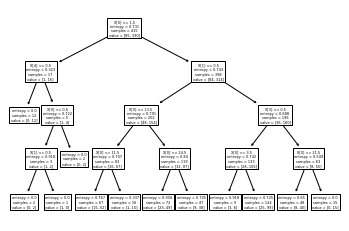

In [ ]:
#plot decision tree
tree.plot_tree(model)

[Text(651.0, 815.4, 'Undergrad_YES <= 1.5\nentropy = 0.731\nsamples = 415\nvalue = [85, 330]\nclass = Good'),
 Text(186.0, 634.2, 'Marital.Status_MarriedWork.Experience <= 0.5\nentropy = 0.323\nsamples = 17\nvalue = [1, 16]\nclass = Good'),
 Text(93.0, 453.0, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = Good'),
 Text(279.0, 453.0, 'Undergrad_YES <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = Good'),
 Text(186.0, 271.80000000000007, 'Undergrad_No <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = Good'),
 Text(93.0, 90.60000000000002, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Good'),
 Text(279.0, 90.60000000000002, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Risky'),
 Text(372.0, 271.80000000000007, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Good'),
 Text(1116.0, 634.2, 'Undergrad_No <= 0.5\nentropy = 0.743\nsamples = 398\nvalue = [84, 314]\nclass = Good'),
 Text(744.0, 453.0, 'Undergrad_YES <= 13.5\nentropy = 0.791\nsamp

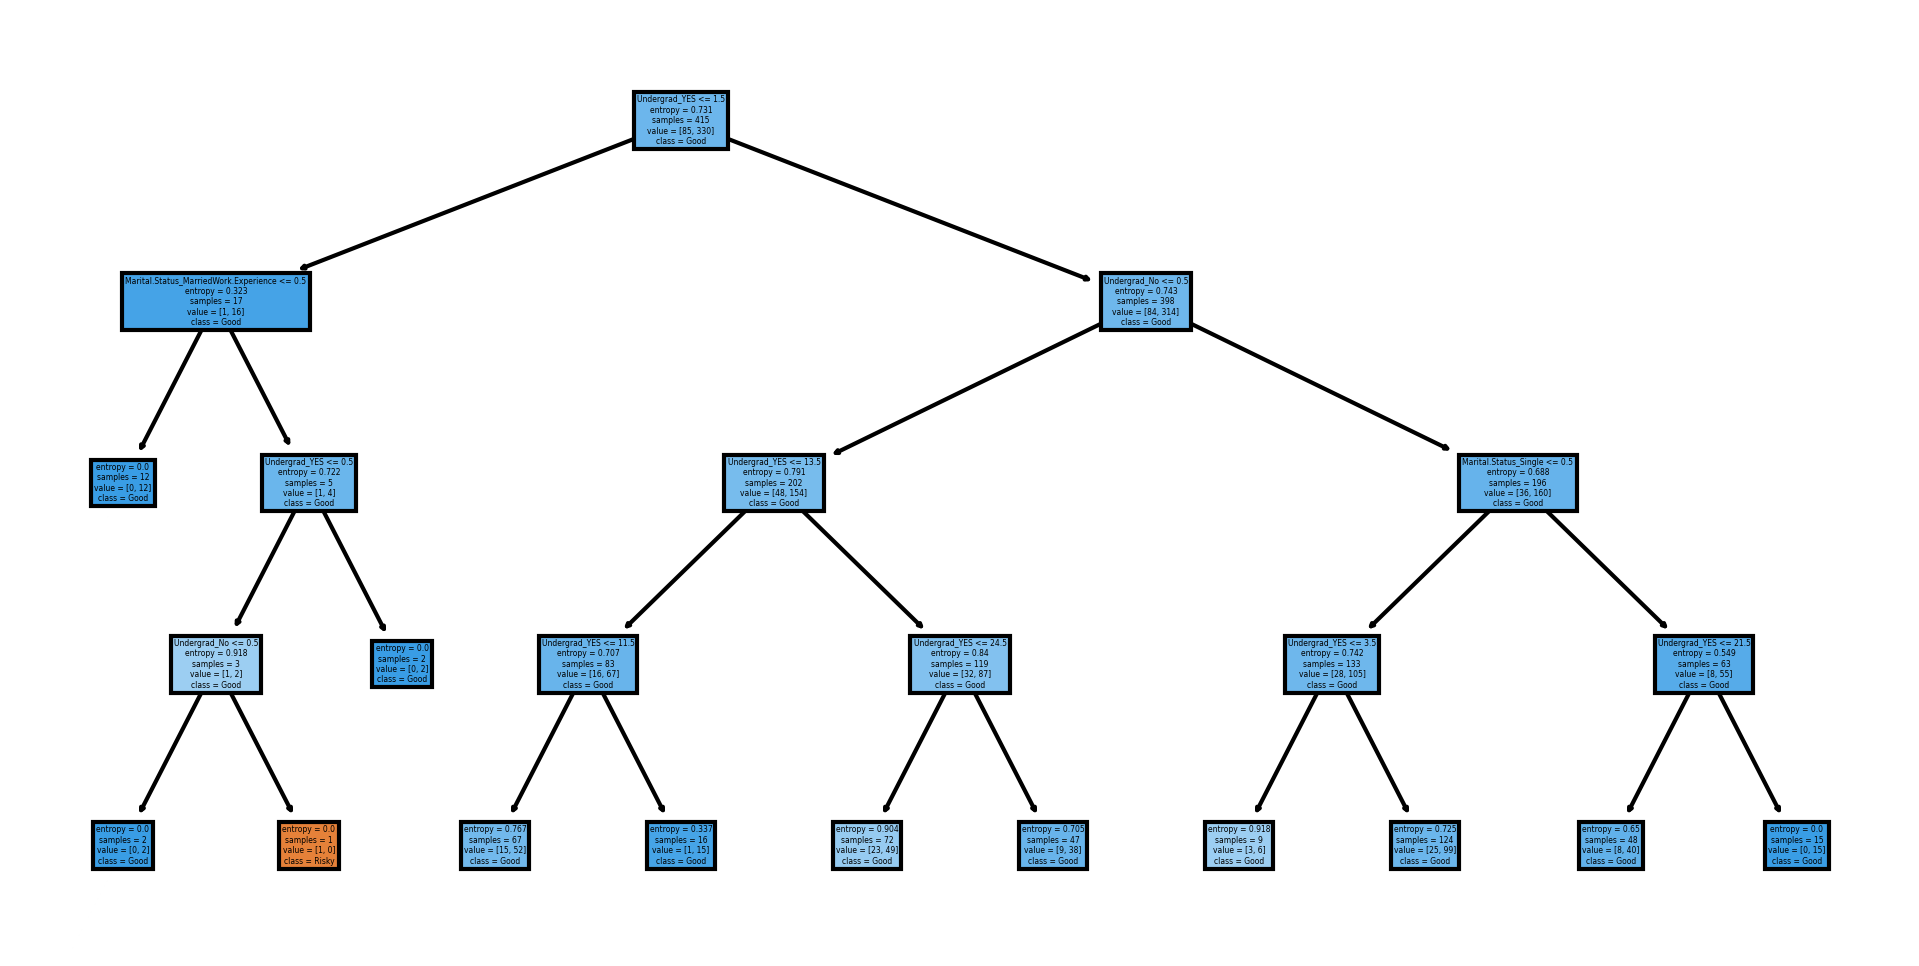

In [ ]:
#to get a better picture
fn=['Undergrad_YES', 'Undergrad_No','Marital.Status_Divorced','Marital.Status_Single', 'Marital.Status_Married' 'Work.Experience', 'Urban_YES', 'Urban_NO']
cn=['Risky', 'Good']
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(8,4), dpi=300)
tree.plot_tree(model, feature_names = fn, class_names = cn, filled=True)

In [ ]:
#predict on test data
pred=model.predict(x_test)
pd.Series(pred).value_counts()

1    178
0      1
dtype: int64

In [ ]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [ ]:
#getting 2 way table of y_test and pred
pd.crosstab(y_test, pred)

col_0,0,1
Category,,
0,0,33
1,1,145


In [ ]:
#Accuracy
np.mean(pred==y_test)

0.8100558659217877

**Decision Tree using CART**

In [ ]:
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=4)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
pred_gini = model_gini.predict(x_test)

In [ ]:
#getting 2 way table of y_test and pred
pd.crosstab(y_test, pred_gini)

col_0,0,1
Category,,
0,0,33
1,1,145


In [ ]:
#Accuracy
np.mean(pred_gini==y_test)

0.8100558659217877

**Display x_test, y_test and pred values in df.**

In [ ]:
pred_gini = pd.DataFrame(pred_gini)
pred_gini.columns = ['Category_pred']

In [ ]:
x_test1 = x_test.reset_index()
x_test1

In [ ]:
y_test = pd.DataFrame(y_test)
y_test.columns = ['Category_test']
y_test1 = y_test.reset_index().drop('index', axis=1)


In [ ]:
#predicted model
with pd.option_context("display.max_rows", None):
    display(pd.concat([x_test1, y_test1, pred_gini], axis=1))


,index,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Category_test,Category_pred
0,432,20,1,0,0,1,0,1,0,1,1
1,17,23,0,1,0,0,1,1,0,0,1
2,174,15,0,1,0,0,1,1,0,1,1
3,44,20,1,0,1,0,0,1,0,0,1
4,469,5,1,0,0,1,0,0,1,1,1
5,54,9,1,0,0,1,0,0,1,0,1
6,219,11,0,1,1,0,0,1,0,1,1
7,427,5,0,1,0,0,1,1,0,1,1
8,297,17,0,1,0,0,1,0,1,1,1
9,46,10,1,0,1,0,0,1,0,0,1


**Results by Random Forest**

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

seed = 7             #num of nodes(i) 
max_features = 8     #num of features to be selected in random forest(k)
k_fold = KFold(n_splits = 10, shuffle=True, random_state=seed)       #n_splits=k in KFold
model = RandomForestClassifier(n_estimators=2000, max_features=max_features, random_state=seed)  #n_estimators= num of trees
results = cross_val_score(model, x, y, cv=k_fold)
print(results.mean())

0.7137005649717514


Even after trying different iterations for max_features and n_estimators we are getting accuracy between 70-72 only. 

In [25]:
model.fit(x_train, y_train)
pred_rf = model.predict(x_test)

In [26]:
pred_rf

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1])

In [29]:
y_test

432    1
17     0
174    1
44     0
469    1
54     0
219    1
427    1
297    1
46     0
143    1
396    1
13     0
258    1
138    1
199    1
339    1
77     0
588    1
16     0
523    1
83     0
589    1
445    1
175    1
147    1
268    1
527    1
585    1
513    1
321    1
124    1
580    1
27     0
315    1
351    1
451    1
99     0
591    1
507    1
576    1
0      0
187    1
299    1
263    1
409    1
285    1
271    1
202    1
540    1
564    1
112    0
509    1
102    0
296    1
15     0
596    1
362    1
249    1
200    1
387    1
346    1
401    1
338    1
563    1
535    1
208    1
206    1
164    1
218    1
415    1
324    1
566    1
372    1
194    1
150    1
545    1
90     0
160    1
521    1
51     0
529    1
238    1
223    1
283    1
178    1
520    1
356    1
465    1
228    1
407    1
201    1
381    1
340    1
120    0
203    1
293    1
209    1
35     0
167    1
348    1
59     0
389    1
205    1
270    1
448    1
472    1
568    1
116    0
420    1
165    1
1